In [104]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from textblob import TextBlob
from plotly import graph_objs as go
from wordcloud import WordCloud

In [105]:
df=pd.read_csv("/Users/rutvajoshi/Documents/Masters final project/Finaltopic_distribution_abarth_e.csv")
df.head()

0         1         2         3         4         5         6  \
0  0.008905  0.069353  0.012298  0.678346  0.001887  0.213038  0.007501   
1  0.415798  0.001726  0.008379  0.006915  0.001286  0.554878  0.005110   
2  0.362915  0.000759  0.263862  0.003040  0.000565  0.344001  0.022260   
3  0.361511  0.002235  0.010849  0.244724  0.001665  0.364752  0.006616   
4  0.044937  0.012786  0.736448  0.051220  0.009524  0.063480  0.037851   

          7         8         9  \
0  0.002565  0.002729  0.003376   
1  0.001748  0.001860  0.002300   
2  0.000768  0.000817  0.001011   
3  0.002263  0.002408  0.002978   
4  0.012946  0.013773  0.017035   

                                            Comments  
0  Anyone else notice this. \n \nNeither Zoe nor ...  
1  Skoda Superb Mk3 \n \n93.42 \n \nSkoda Yeti Mk...  
2  Are you saying that the ZOE topped the reliabi...  
3  They need a certain number off entrant's \nOr ...  
4  Electric cars dominate Driver Power 2016, the ...

In [106]:
# Function to calculate sentiment polarity using TextBlob
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity


In [107]:
# Apply sentiment analysis to the 'Comments' column
df['sentiment_polarity'] = df['Comments'].apply(get_sentiment_polarity)


In [108]:
# Define a function to label sentiments
def label_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


In [109]:
# Apply the sentiment labeling function
df['sentiment_label'] = df['sentiment_polarity'].apply(label_sentiment)

# Display the updated dataset
df.head()

0         1         2         3         4         5         6  \
0  0.008905  0.069353  0.012298  0.678346  0.001887  0.213038  0.007501   
1  0.415798  0.001726  0.008379  0.006915  0.001286  0.554878  0.005110   
2  0.362915  0.000759  0.263862  0.003040  0.000565  0.344001  0.022260   
3  0.361511  0.002235  0.010849  0.244724  0.001665  0.364752  0.006616   
4  0.044937  0.012786  0.736448  0.051220  0.009524  0.063480  0.037851   

          7         8         9  \
0  0.002565  0.002729  0.003376   
1  0.001748  0.001860  0.002300   
2  0.000768  0.000817  0.001011   
3  0.002263  0.002408  0.002978   
4  0.012946  0.013773  0.017035   

                                            Comments  sentiment_polarity  \
0  Anyone else notice this. \n \nNeither Zoe nor ...           -0.034325   
1  Skoda Superb Mk3 \n \n93.42 \n \nSkoda Yeti Mk...            0.708333   
2  Are you saying that the ZOE topped the reliabi...            0.166667   
3  They need a certain number off entrant's \nOr ...            0.357143   
4  Electric cars dominate Driver Power 2016, the ...            0.000000   

  sentiment_label  
0        Negative  
1        Positive  
2        Positive  
3        Positive  
4         Neutral

In [110]:
# Combine all comments into a single string
all_comments = ' '.join(df['Comments'])


In [111]:
# Combine all comments for each sentiment into a single string
positive_comments = ' '.join(df[df['sentiment_label'] == 'Positive']['Comments'])
negative_comments = ' '.join(df[df['sentiment_label'] == 'Negative']['Comments'])
neutral_comments = ' '.join(df[df['sentiment_label'] == 'Neutral']['Comments'])


In [112]:
# Create WordCloud objects for each sentiment
positive_wordcloud = WordCloud(width=400, height=400, background_color='white', max_words=150).generate(positive_comments)
negative_wordcloud = WordCloud(width=400, height=400, background_color='white', max_words=150).generate(negative_comments)
neutral_wordcloud = WordCloud(width=400, height=400, background_color='white', max_words=150).generate(neutral_comments)


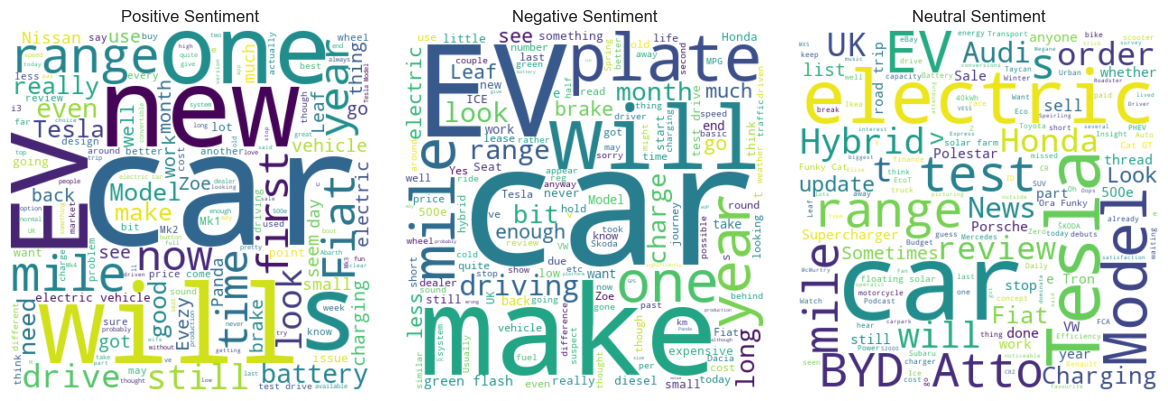

In [113]:
# Plot the WordCloud images with different colors for each sentiment
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis("off")

plt.subplot(132)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis("off")

plt.subplot(133)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis("off")

plt.tight_layout()
plt.show()

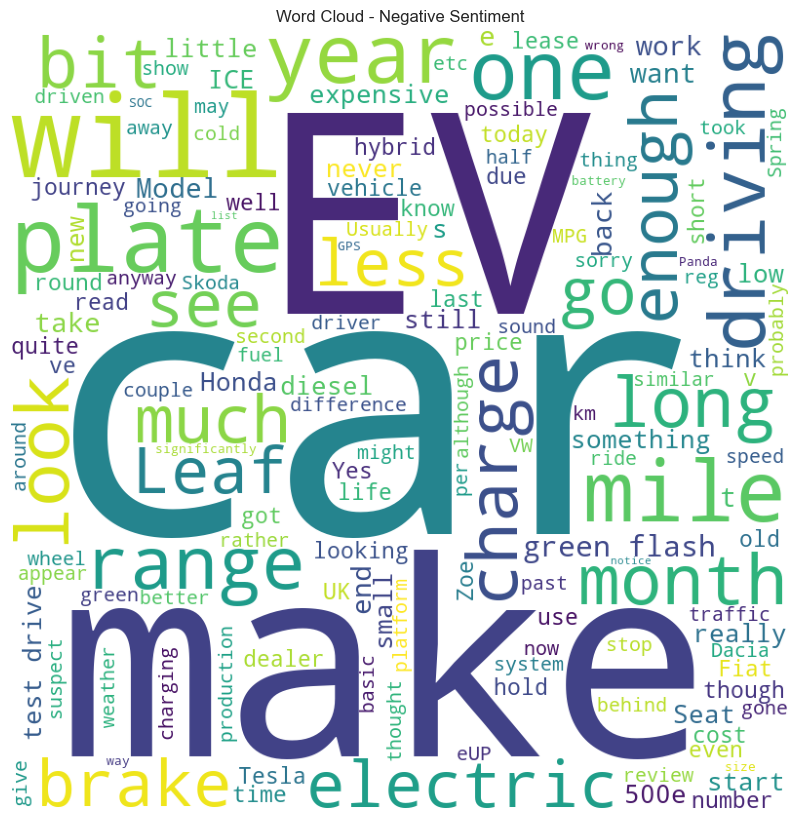

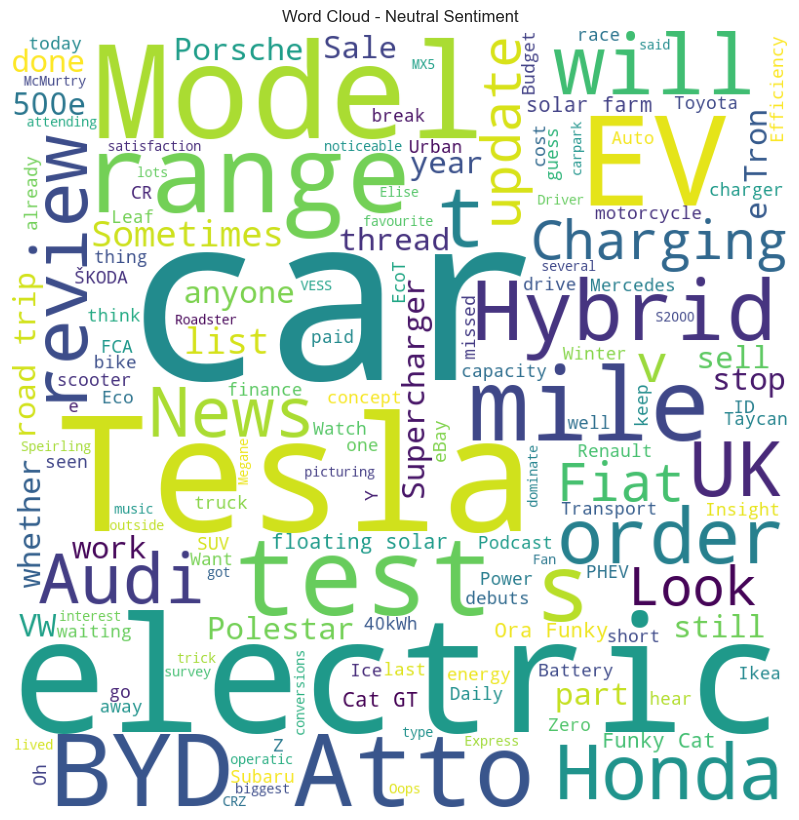

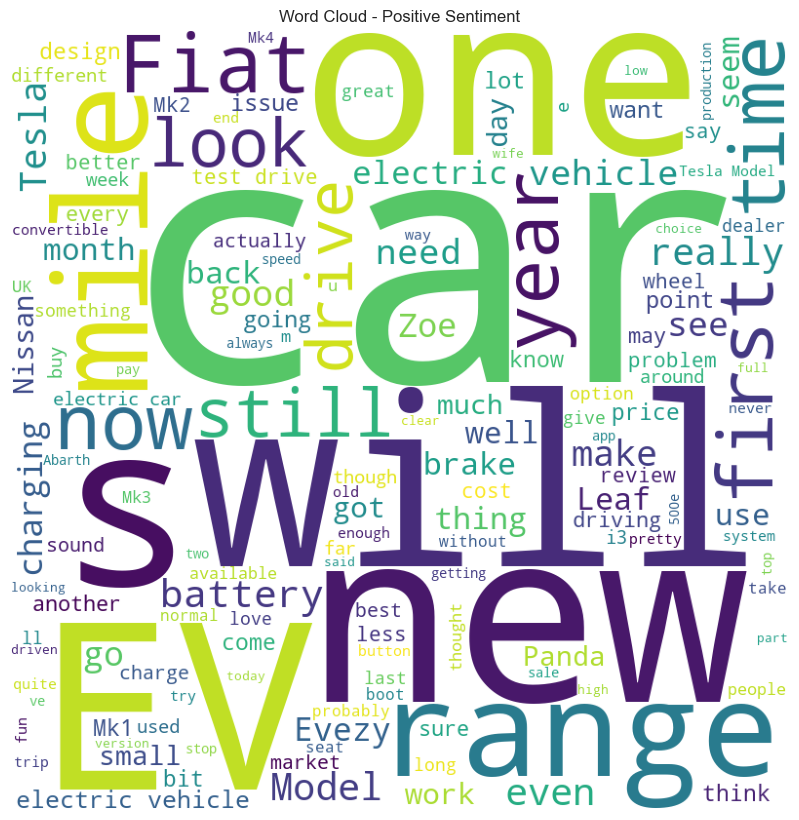

In [114]:
# Iterate through each sentiment label and create a word cloud
for sentiment_label, color in zip(sentiment_labels, sentiment_colors):
    # Combine all comments for the current sentiment into a single string
    sentiment_comments = ' '.join(df[df['sentiment_label'] == sentiment_label]['Comments'])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(sentiment_comments)

    # Plot the WordCloud image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.title(f'Word Cloud - {sentiment_label} Sentiment')
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()


In [115]:
# Column index to drop
column_to_drop = "Comments"

In [116]:
# Drop the specified column
df= df.drop(columns=[column_to_drop])
df.head()

0         1         2         3         4         5         6  \
0  0.008905  0.069353  0.012298  0.678346  0.001887  0.213038  0.007501   
1  0.415798  0.001726  0.008379  0.006915  0.001286  0.554878  0.005110   
2  0.362915  0.000759  0.263862  0.003040  0.000565  0.344001  0.022260   
3  0.361511  0.002235  0.010849  0.244724  0.001665  0.364752  0.006616   
4  0.044937  0.012786  0.736448  0.051220  0.009524  0.063480  0.037851   

          7         8         9  sentiment_polarity sentiment_label  
0  0.002565  0.002729  0.003376           -0.034325        Negative  
1  0.001748  0.001860  0.002300            0.708333        Positive  
2  0.000768  0.000817  0.001011            0.166667        Positive  
3  0.002263  0.002408  0.002978            0.357143        Positive  
4  0.012946  0.013773  0.017035            0.000000         Neutral

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0                   407 non-null    float64
 1   1                   407 non-null    float64
 2   2                   407 non-null    float64
 3   3                   407 non-null    float64
 4   4                   407 non-null    float64
 5   5                   407 non-null    float64
 6   6                   407 non-null    float64
 7   7                   407 non-null    float64
 8   8                   407 non-null    float64
 9   9                   407 non-null    float64
 10  sentiment_polarity  407 non-null    float64
 11  sentiment_label     407 non-null    object 
dtypes: float64(11), object(1)
memory usage: 38.3+ KB


In [118]:
#Missing values computation
df.isnull().sum()

0                     0
1                     0
2                     0
3                     0
4                     0
5                     0
6                     0
7                     0
8                     0
9                     0
sentiment_polarity    0
sentiment_label       0
dtype: int64

In [119]:
X= df.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values

In [120]:
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/Users/rutvajoshi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/rutvajoshi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/rutvajoshi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/rutvajoshi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/rutvajoshi/opt/anaconda3/lib/python3.9/si

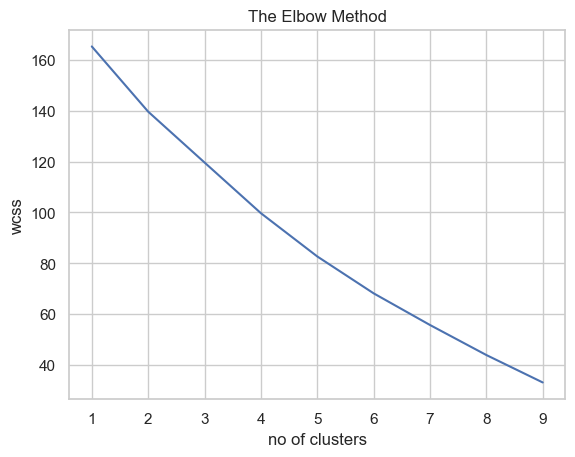

In [121]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [122]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
# Add cluster labels to the DataFrame
df['cluster_label'] = y_kmeans



/Users/rutvajoshi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [123]:
# Extract the columns containing topic probabilities (0 to 14)
topic_probs = df.iloc[:, :10]

In [124]:
# Assign topics based on maximum probability column index
assigned_topics = topic_probs.idxmax(axis=1)


In [125]:
# Add the assigned topics to the DataFrame
df['assigned_topic'] = assigned_topics

In [126]:
df.head(50)

0         1         2         3         4         5         6  \
0   0.008905  0.069353  0.012298  0.678346  0.001887  0.213038  0.007501   
1   0.415798  0.001726  0.008379  0.006915  0.001286  0.554878  0.005110   
2   0.362915  0.000759  0.263862  0.003040  0.000565  0.344001  0.022260   
3   0.361511  0.002235  0.010849  0.244724  0.001665  0.364752  0.006616   
4   0.044937  0.012786  0.736448  0.051220  0.009524  0.063480  0.037851   
5   0.763290  0.003169  0.015382  0.179840  0.002360  0.015733  0.009381   
6   0.133616  0.002375  0.387335  0.009514  0.001769  0.011792  0.382837   
7   0.026838  0.007637  0.037065  0.634740  0.005688  0.037912  0.022606   
8   0.593378  0.005444  0.026423  0.165369  0.004055  0.027027  0.016115   
9   0.005338  0.281904  0.007372  0.086194  0.001131  0.568311  0.044551   
10  0.138006  0.039269  0.190599  0.157303  0.029249  0.194955  0.116244   
11  0.013373  0.003805  0.018469  0.617310  0.002834  0.119235  0.211953   
12  0.001481  0.000421  0.002046  0.012804  0.000314  0.002093  0.979399   
13  0.142644  0.001726  0.509161  0.006915  0.001286  0.327250  0.005110   
14  0.014864  0.004230  0.912822  0.016943  0.003150  0.020998  0.012520   
15  0.026838  0.007637  0.439832  0.030590  0.005688  0.440679  0.022606   
16  0.003705  0.696162  0.005117  0.282266  0.000785  0.005234  0.003121   
17  0.387933  0.001809  0.247264  0.007245  0.049044  0.295162  0.005354   
18  0.004447  0.001265  0.640201  0.038441  0.000943  0.006283  0.304090   
19  0.013373  0.003805  0.720881  0.015242  0.203523  0.018891  0.011264   
20  0.009542  0.002715  0.299596  0.440502  0.002022  0.085084  0.151246   
21  0.014864  0.004230  0.801286  0.016943  0.003150  0.020998  0.012520   
22  0.214062  0.003805  0.620536  0.015242  0.002834  0.119235  0.011264   
23  0.141141  0.000441  0.141732  0.083195  0.000329  0.386064  0.245589   
24  0.010278  0.002925  0.091322  0.397350  0.002178  0.014520  0.471419   
25  0.004601  0.001309  0.006354  0.108815  0.000975  0.731496  0.107446   
26  0.095046  0.001150  0.157256  0.156281  0.000857  0.460730  0.124744   
27  0.142269  0.130299  0.023106  0.019069  0.003546  0.274712  0.390709   
28  0.012153  0.003458  0.016785  0.561015  0.002576  0.290750  0.101431   
29  0.362915  0.000759  0.243849  0.003040  0.000565  0.364015  0.022260   
30  0.361511  0.002235  0.010849  0.185781  0.001665  0.423695  0.006616   
31  0.044937  0.012786  0.736448  0.051220  0.009524  0.063480  0.037851   
32  0.679717  0.003169  0.015382  0.179840  0.002360  0.099306  0.009381   
33  0.070981  0.002375  0.387335  0.009514  0.001769  0.011792  0.382837   
34  0.003102  0.000883  0.004284  0.422475  0.000657  0.539693  0.025887   
35  0.003605  0.001026  0.004979  0.382839  0.000764  0.329718  0.273558   
36  0.285734  0.094652  0.016785  0.013852  0.002576  0.564331  0.010237   
37  0.005338  0.362014  0.007372  0.086194  0.001131  0.528256  0.004496   
38  0.138006  0.039269  0.190599  0.157303  0.029249  0.194955  0.116244   
39  0.013373  0.003805  0.018469  0.416621  0.002834  0.420269  0.111609   
40  0.001568  0.000446  0.002166  0.013557  0.000332  0.002216  0.978186   
41  0.001498  0.000426  0.103231  0.507521  0.011558  0.114519  0.226068   
42  0.044937  0.012786  0.062062  0.051220  0.009524  0.063480  0.037851   
43  0.007027  0.001999  0.431520  0.271644  0.001489  0.062653  0.216826   
44  0.003176  0.000904  0.981375  0.003620  0.000673  0.004486  0.002675   
45  0.014864  0.004230  0.466676  0.351553  0.003150  0.132535  0.012520   
46  0.022339  0.006356  0.198478  0.695967  0.004735  0.031557  0.018816   
47  0.045393  0.001519  0.287757  0.406635  0.001131  0.007541  0.244826   
48  0.007027  0.001999  0.062431  0.113463  0.054216  0.537195  0.005919   
49  0.003176  0.000904  0.981375  0.003620  0.000673  0.004486  0.002675   

           7         8         9  sentiment_polarity sentiment_label  \
0   0.002565  0.002729  0.003376           -0.034325        Ne

In [127]:
# Step 1: Interpret Cluster Labels
cluster_summary = df.groupby('assigned_topic').mean()
print(cluster_summary)


                       0         1         2         3         4         5  \
assigned_topic                                                               
0               0.662302  0.028042  0.077864  0.054891  0.011755  0.078429   
1               0.022090  0.747367  0.039828  0.055293  0.015178  0.036100   
2               0.047570  0.010755  0.587870  0.093782  0.010649  0.091930   
3               0.065921  0.013172  0.114359  0.575006  0.003647  0.113564   
4               0.010720  0.003050  0.014806  0.012219  0.924591  0.015144   
5               0.092856  0.020794  0.144809  0.118324  0.005846  0.489653   
6               0.050221  0.039456  0.091051  0.085275  0.003381  0.116109   
7               0.015741  0.009796  0.039473  0.033893  0.003336  0.027553   
8               0.021141  0.011082  0.029198  0.024097  0.004481  0.029866   
9               0.021767  0.004229  0.030142  0.022864  0.003150  0.029042   

                       6         7         8         9  sentime

In [128]:
# Step 4: Topic Analysis
cluster_topic_distribution = df.groupby('assigned_topic').size()
print(cluster_topic_distribution)


assigned_topic
0     54
1     19
2     68
3     47
4     21
5    100
6     19
7     27
8     18
9     34
dtype: int64


In [129]:
# Count the occurrences of each topic
topic_counts = df['assigned_topic'].value_counts()


In [130]:
# Convert topic numbers to integers and sort the topic counts
topic_counts.index = topic_counts.index.astype(int)
sorted_topic_counts = topic_counts.sort_index()


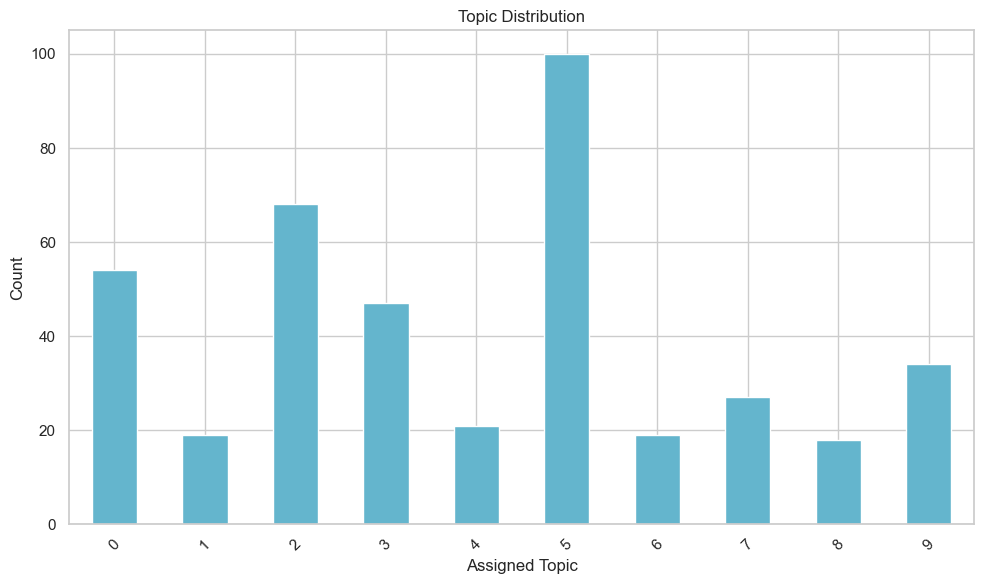

In [131]:
# Plot the sorted topic distribution
plt.figure(figsize=(10, 6))
sorted_topic_counts.plot(kind='bar', color='c')
plt.xlabel('Assigned Topic')
plt.ylabel('Count')
plt.title('Topic Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [132]:
# Define the themes list based on the provided themes
themes = ["Electric Vehicle (EV) Reviews",
          "Urban Mobility and Comparisons",
          "EV Costs and Buying Trends",
          "Charging Concerns and Tips",
          "New Car Releases and Discussions",
          "Battery Performance and Range",
          "Driving Experiences and Range",
          "Abarth Electric Car Excitement",
          "Design and Performance of New EVs",
          "Enthusiasm for EV Models"]


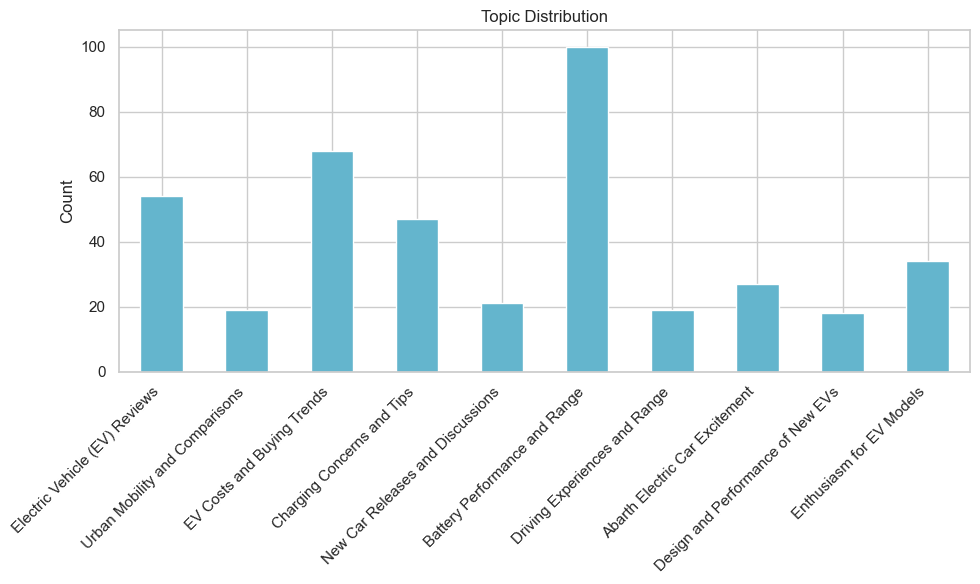

In [133]:
# Plot the sorted topic distribution
plt.figure(figsize=(10, 6))
sorted_topic_counts.plot(kind='bar', color='c')
plt.ylabel('Count')
plt.title('Topic Distribution')

# Customize x-axis labels
plt.xticks(range(len(themes)), themes, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [134]:
# Analyze sentiment distribution
sentiment_counts = df['sentiment_label'].value_counts()


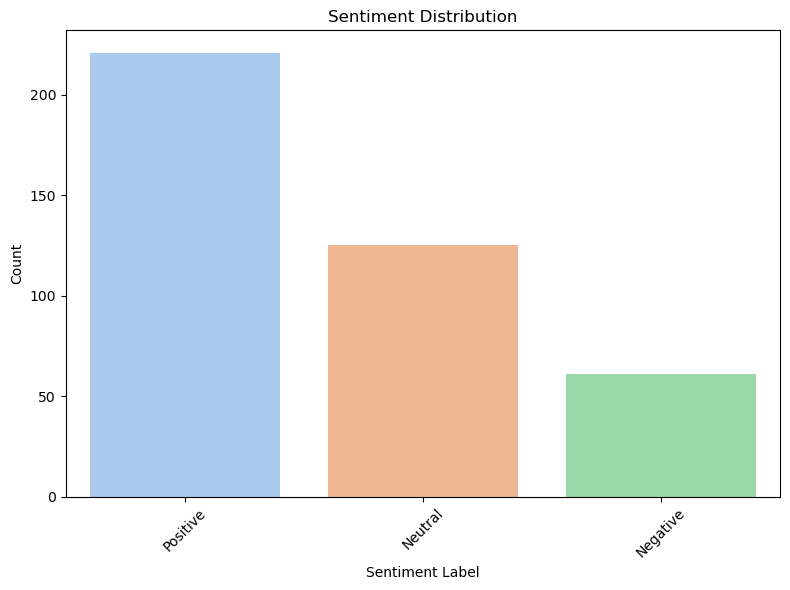

In [34]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [35]:
import plotly.graph_objects as go

fig = go.Figure(go.Funnelarea(
    text=sentiment_counts.index,
    values=sentiment_counts,
    title={"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"},
    textinfo="label+value"  # Display both label name and value
))

fig.show()

In [78]:
# Count the occurrences of each sentiment label and sort them by index
sentiment_counts = df['sentiment_label'].value_counts().sort_index()


In [95]:
# Define sentiment labels and colors
sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['red', 'dodgerblue', 'greenyellow']

In [96]:
# Create the Pie chart using Plotly
fig = go.Figure(data=[go.Pie(
    labels=sentiment_counts.index,
    values=sentiment_counts.values,
    textinfo='percent+value+label',
    marker_colors=sentiment_colors,
    textposition='auto',
    hole=0.3
)])

# Update the layout of the chart
fig.update_layout(
    title_text='Sentiment Distribution',
    template='plotly_white',
    xaxis=dict(title='Sources'),
    yaxis=dict(title='Number of Posts in Twitter')
)

# Update the style of chart elements
fig.update_traces(marker_line_color='black', marker_line_width=1.5, opacity=0.8)

# Display the chart
fig.show()


In [36]:
# Explore sentiment across topics
sentiment_by_topic = df.groupby(['assigned_topic', 'sentiment_label']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

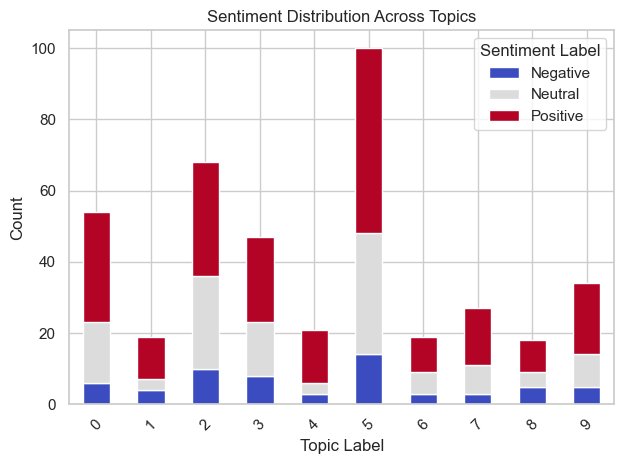

In [84]:
# Visualize sentiment across topics
plt.figure(figsize=(12, 8))
sentiment_by_topic.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.xlabel('Topic Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution Across Topics')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()

In [38]:
# Explore sentiment across clusters
sentiment_by_cluster = df.groupby(['cluster_label', 'sentiment_label']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

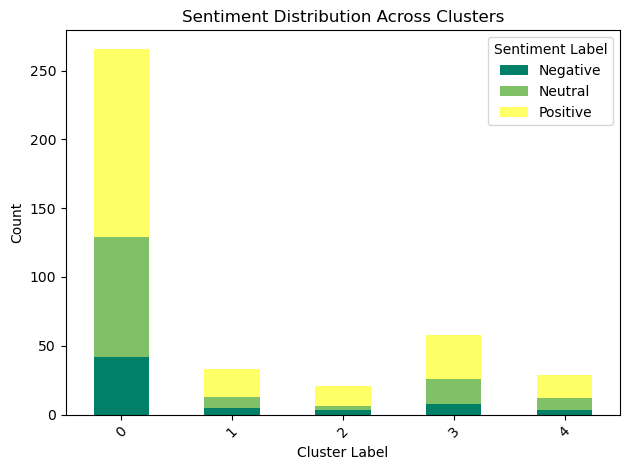

In [39]:
# Visualize sentiment across clusters
plt.figure(figsize=(12, 8))
sentiment_by_cluster.plot(kind='bar', stacked=True, colormap='summer')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution Across Clusters')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()

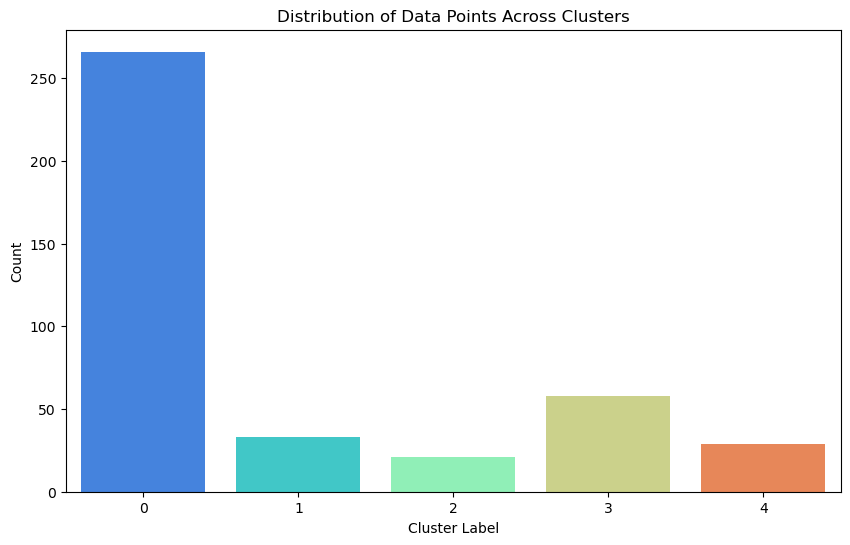

In [40]:
# Plot the distribution of data points across clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster_label', data=df, palette='rainbow')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Distribution of Data Points Across Clusters')
plt.show()

In [41]:
# Explore cluster characteristics
cluster_characteristics = df.groupby('cluster_label').mean()


In [42]:
# Print cluster characteristics
print(cluster_characteristics)

                      0         1         2         3         4         5  \
cluster_label                                                               
0              0.058476  0.069726  0.238318  0.180975  0.007105  0.231641   
1              0.021614  0.004126  0.023830  0.016527  0.003073  0.028774   
2              0.010720  0.003050  0.014806  0.012219  0.924591  0.015144   
3              0.647335  0.026472  0.065610  0.057297  0.011216  0.112925   
4              0.016864  0.009749  0.039802  0.034074  0.003574  0.028774   

                      6         7         8         9  sentiment_polarity  
cluster_label                                                              
0              0.114403  0.011119  0.073834  0.014403            0.098224  
1              0.014977  0.004177  0.004444  0.878459            0.078916  
2              0.009030  0.003088  0.003286  0.004064            0.114216  
3              0.048032  0.012051  0.007554  0.011508            0.127548  
4   

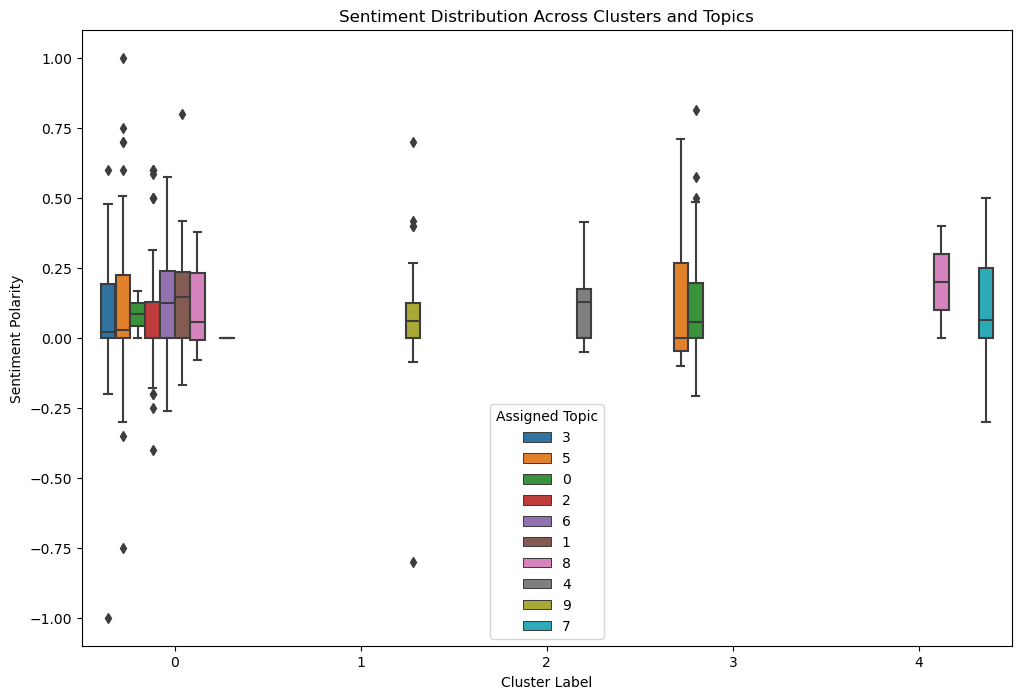

In [43]:
# Explore sentiment distribution across clusters and topics
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster_label', y='sentiment_polarity', hue='assigned_topic', data=df)
plt.xlabel('Cluster Label')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Distribution Across Clusters and Topics')
plt.legend(title='Assigned Topic')
plt.show()

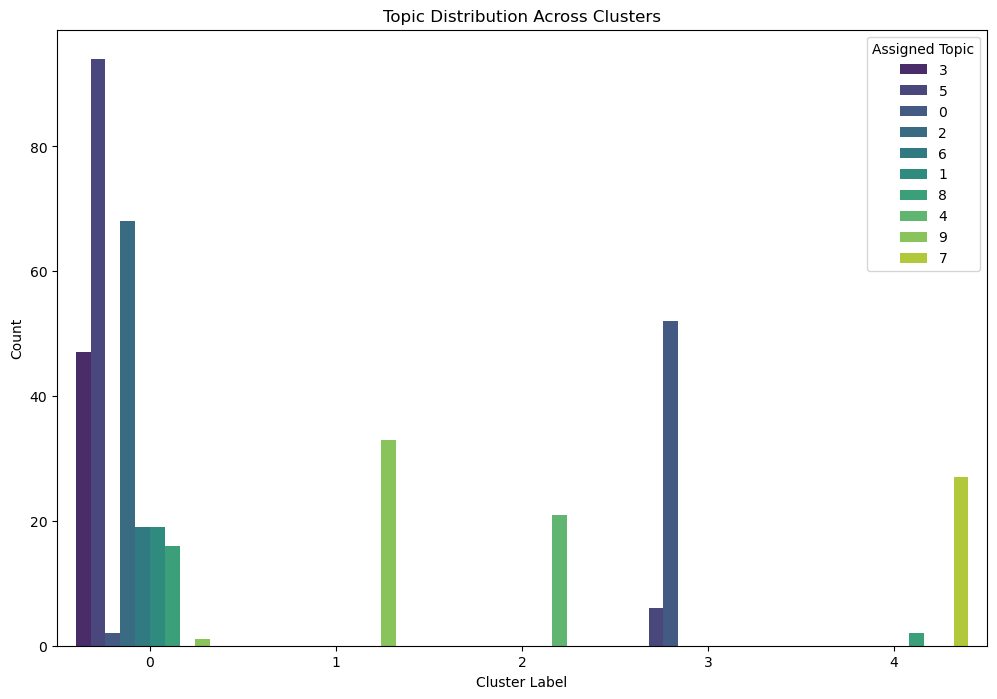

In [44]:
# Explore topic distribution across clusters
plt.figure(figsize=(12, 8))
sns.countplot(x='cluster_label', hue='assigned_topic', data=df, palette='viridis')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Topic Distribution Across Clusters')
plt.legend(title='Assigned Topic')
plt.show()

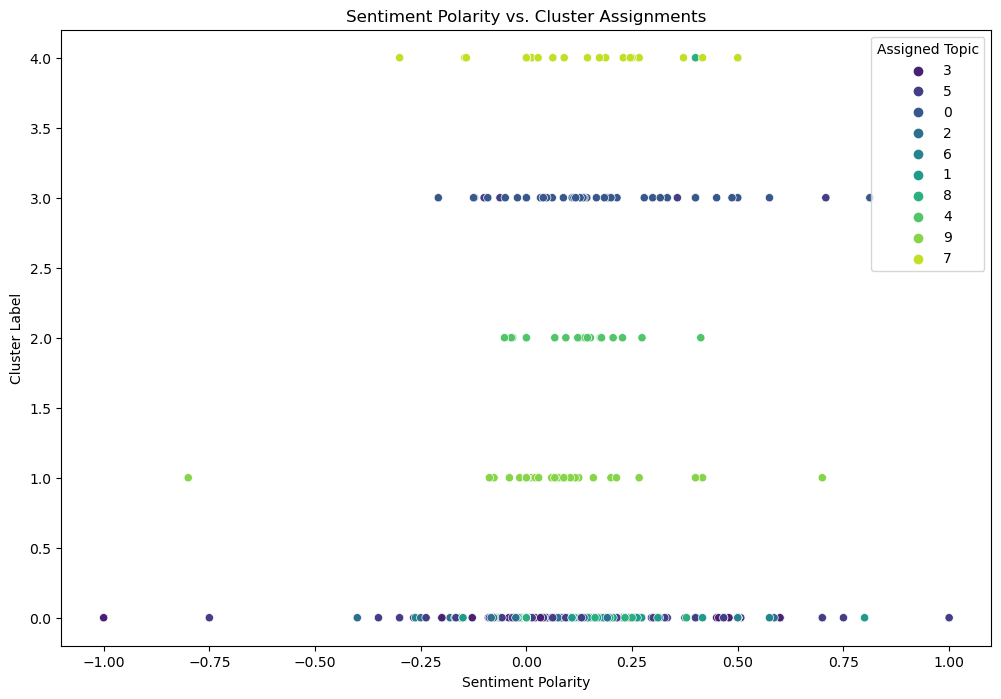

In [45]:
# Create scatter plots to visualize sentiment polarity vs. cluster assignments
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sentiment_polarity', y='cluster_label', hue='assigned_topic', data=df, palette='viridis')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Cluster Label')
plt.title('Sentiment Polarity vs. Cluster Assignments')
plt.legend(title='Assigned Topic')
plt.show()

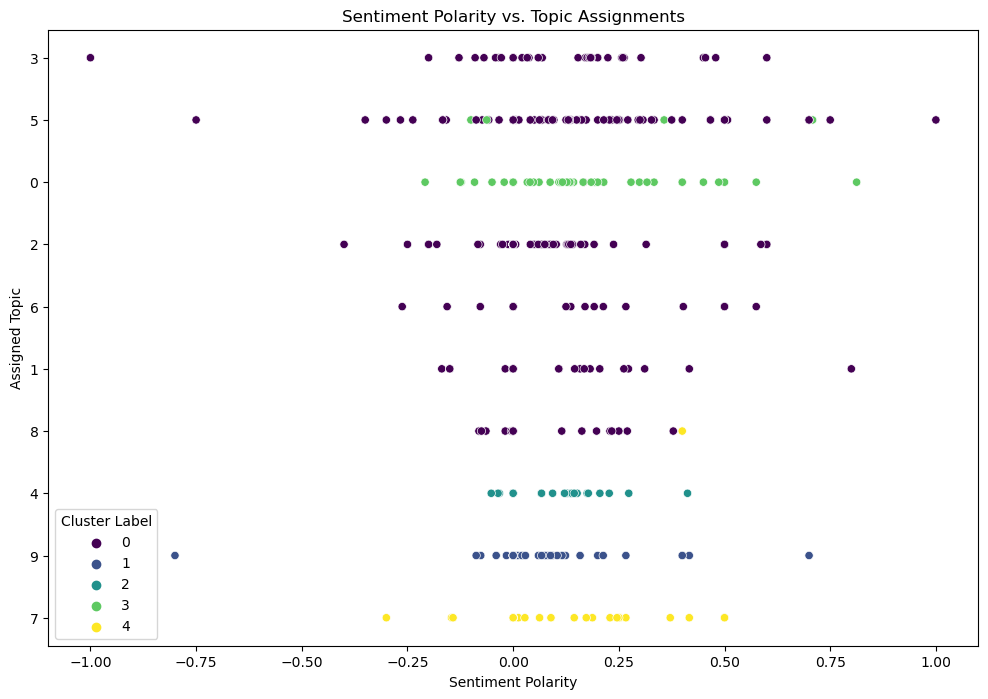

In [46]:
# Create scatter plots to visualize sentiment polarity vs. topic assignments
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sentiment_polarity', y='assigned_topic', hue='cluster_label', data=df, palette='viridis')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Assigned Topic')
plt.title('Sentiment Polarity vs. Topic Assignments')
plt.legend(title='Cluster Label')
plt.show()

In [47]:
# Calculate average sentiment polarity for each cluster and topic
cluster_sentiment_avg = df.groupby('cluster_label')['sentiment_polarity'].mean()
topic_sentiment_avg = df.groupby('assigned_topic')['sentiment_polarity'].mean()


In [48]:
# Identify clusters with positive sentiment and associated topics
positive_clusters = cluster_sentiment_avg[cluster_sentiment_avg > 0].index
positive_topics = df[df['cluster_label'].isin(positive_clusters)]['assigned_topic'].unique()


In [49]:
# Print insights
print("Clusters with Positive Sentiment:", positive_clusters)
print("Associated Positive Topics:", positive_topics)

Clusters with Positive Sentiment: Int64Index([0, 1, 2, 3, 4], dtype='int64', name='cluster_label')
Associated Positive Topics: ['3' '5' '0' '2' '6' '1' '8' '4' '9' '7']


<Figure size 1500x600 with 0 Axes>

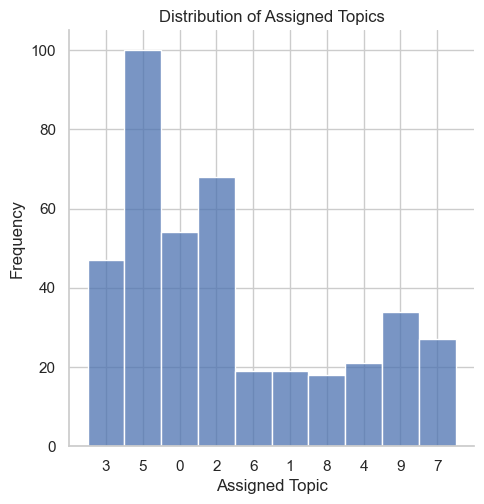

In [50]:
plt.figure(figsize=(15, 6))
sns.set(style='whitegrid')
sns.displot(data=df, x='assigned_topic', bins=len(df['assigned_topic'].unique()), kde=False)
plt.title('Distribution of Assigned Topics')
plt.xlabel('Assigned Topic')
plt.ylabel('Frequency')
plt.show()

In [ ]:
 https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model/notebook#Most-common-words-Sentiments-Wise
        https://www.kaggle.com/code/prashant111/k-means-clustering-with-python
            https://github.com/mehranshakarami/AI_Spectrum/blob/main/2021/Twitter_API/twitter_api.py
                https://github.com/mehranshakarami/AI_Spectrum/blob/main/2022/Twitter_API/twitter_data_users.py